In [ ]:
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.signal import convolve2d
from scipy.signal import correlate
import pywt
import pandas as pd
import gym
from IPython.display import display, clear_output

In [ ]:
# file_path = "./whale_sample.wav"
file_path = "./20220729_040919UTC_V12.wav"
samplerate, data = wavfile.read(file_path)
samplerate = samplerate/(2**7)

signal=data[::2]
signal=signal[::2]
signal=signal[::2]
signal=signal[::2]
signal=signal[::2]
signal=signal[::2]
signal=signal[::2]

In [ ]:
data.shape

(76775040, 5)

In [ ]:
samplerate

2000.0

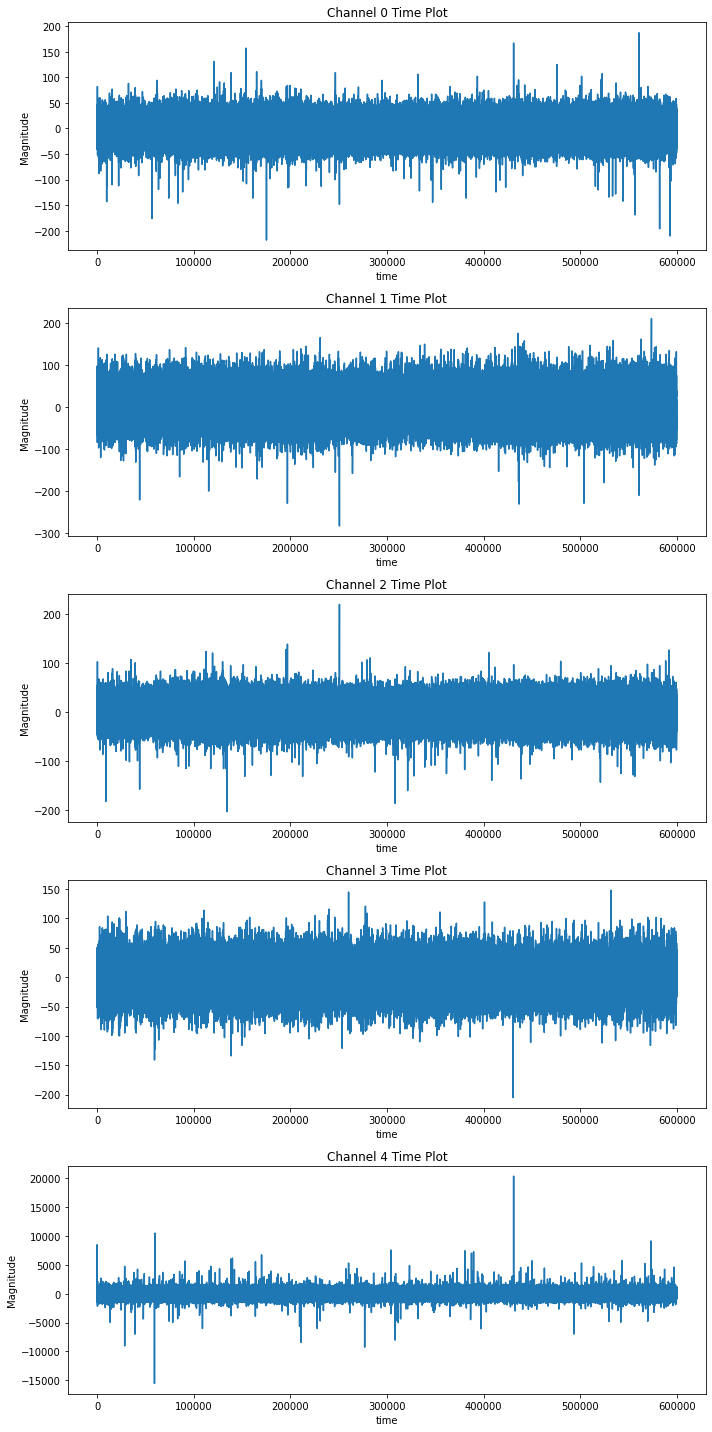

In [ ]:
channels = np.split(signal, 5, axis=1)
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
for i, channel in enumerate(channels):
    axs[i].plot(channel)
    axs[i].set_xlabel("time")
    axs[i].set_ylabel("Magnitude")
    axs[i].set_title(f"Channel {i} Time Plot")
plt.tight_layout()
plt.show()

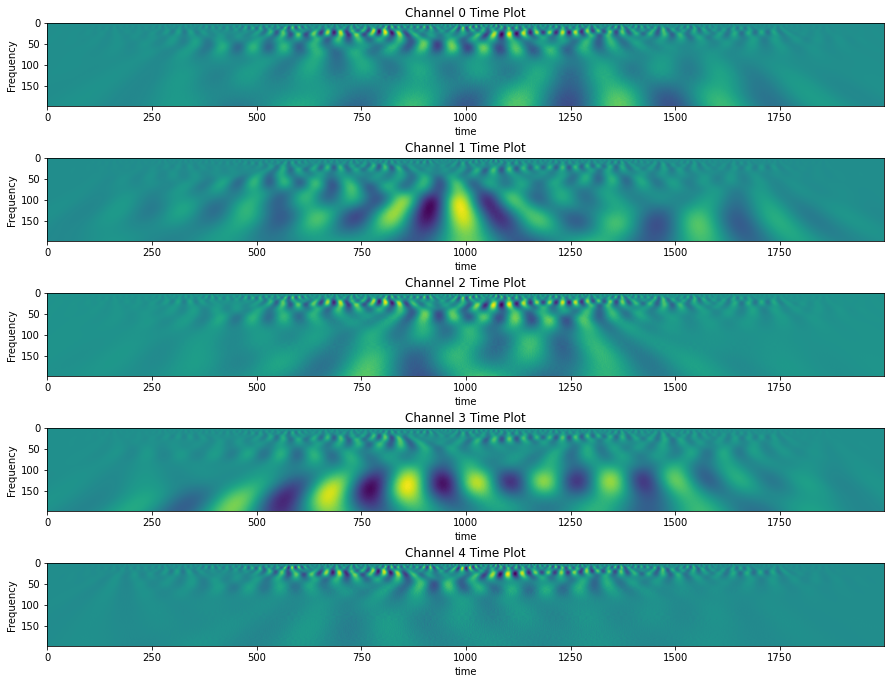

In [ ]:
L=2000
i=0
scales = np.arange(1,200,1)

coef0,freqs = pywt.cwt(np.hanning(L)*signal[i:i+L,0], scales, 'morl')
coef1,freqs = pywt.cwt(np.hanning(L)*signal[i:i+L,1], scales, 'morl')
coef2,freqs = pywt.cwt(np.hanning(L)*signal[i:i+L,2], scales, 'morl')
coef3,freqs = pywt.cwt(np.hanning(L)*signal[i:i+L,3], scales, 'morl')
coef4,freqs = pywt.cwt(np.hanning(L)*(-signal[i:i+L,4]), scales, 'morl')

coefs = [coef0, coef1, coef2, coef3, coef4]
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
for i, channel in enumerate(coefs):
    # axs[i].plot(x, signal_band[-1])
    axs[i].imshow(channel)
    axs[i].set_xlabel("time")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Channel {i} Time Plot")

# plt.tight_layout()
plt.show()

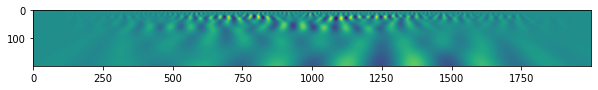

In [ ]:
def showWindow(signal, i, t, LH, samplerate,  T=1):
    wd, _ = pywt.cwt(np.hanning(int(T*samplerate))*signal[int(t*samplerate):int((t+T)*samplerate), i], scales, 'morl')
    plt.figure(figsize=(10, 10))
    plt.imshow(wd)
    plt.show()

t = 0
LH = [0,199]

showWindow(signal, 0, t, LH, samplerate)

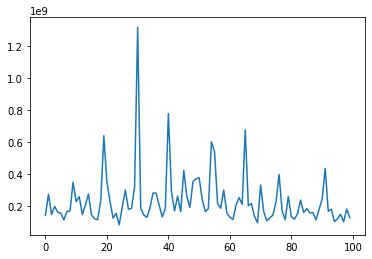

In [ ]:
def energy(signal, i, t, samplerate, LH=None,  T=1):
    wd, _ = pywt.cwt(np.hanning(int(T*samplerate))*signal[int(t*samplerate):int((t+T)*samplerate), i], scales, 'morl')
    if LH != None:
        wd_square = np.power(wd[LH[0]:LH[1], :], 2)
    else:
        wd_square = np.power(wd, 2)
    return np.sum(np.sum(wd_square, axis=0))

t=19.1
i=0
LH = [0, 199]
T = 1

y = []
for t in range(100):
    y.append(energy(signal, i, t*T, samplerate, LH, T))

plt.plot(y)
plt.show()

In [ ]:
data = pd.read_csv("REINFORCEMENT_ANNOTATIONS - SuperData.csv")
data

,Pulse #,General Time (s),Channel,Start Time (s),End Time (s),Peak Time (s),Peak (db),Target
0,1,20,1,19.10,20.15,20.00,-23.0,1
1,2,30,1,30.09,31.15,30.71,-23.0,1
2,3,41,1,40.25,41.25,40.80,-24.0,1
3,4,53,1,53.02,53.83,53.76,-33.0,1
4,5,64,1,64.50,65.96,65.24,-25.0,1
5,6,76,1,75.58,76.57,75.96,-26.0,1
6,7,102,1,102.70,103.55,103.21,-29.0,1
7,8,114,1,114.17,115.28,114.60,-28.0,1
8,9,140,1,140.00,141.10,140.50,-29.5,1
9,10,151,1,150.90,151.90,151.77,-29.0,1


$$r(s) = r_{classify} + {x}r_{HL}$$

In [ ]:
# class WhalePulseEnv(gym.Env):
#     def __init__(self, signal, samplerate):
#         self.T = 1
#         # discretize frequency interval from 0 - 199 into 10 discreate action
#         self._N_state = 100
#         self.observation_space = gym.spaces.Discrete(self._N_state)
#         # gym.spaces.Box(low=0, high=1, shape=(1000,), dtype=np.float32) # energy
#         self._state = None
#         self.action_space = gym.spaces.Discrete(10) # 10 frequency intervals
#         self.frequency_intervals = ["0-19", "20-39", "40-59", "60-79", "80-99.9",
#                                     "100-119", "120-139", "140-159", "160-179", "180-199"]

#         self.annotation = pd.read_csv("REINFORCEMENT_ANNOTATIONS - SuperData.csv")
#         # select only when target == 1 which indicate that there is a signal
#         self.annotation = self.annotation[self.annotation["Target"] == 1]

#         self.signal = signal
#         self.samplerate = samplerate
#         self.energy_scale = 0.00001
#         self.tol = 1e-4

#         self.annotation_idx = 0

#     def energyDensity(self, t, interval, channel=0):
#         LH[0] = interval*20
#         LH[1] = LH[0] + 19
#         Ep = energy(self.signal, channel, t*self.T, self.samplerate, LH, self.T)/((LH[1]-LH[0])*self.T)
#         Ea = energy(self.signal, channel, t*self.T, self.samplerate, None, self.T)

#         Dp = Ep/((LH[1]-LH[0])*self.T)
#         Db = (Ea-Ep)/((199-(LH[1]-LH[0]))*self.T)
#         return Dp, Db

#     def reset(self):
#         # randomly select annotation idx from the annotation
#         self.annotation_idx = np.random.randint(0, len(self.annotation)-1)
#         # Randomly generate a new state for the environment
#         t = self.annotation["Start Time (s)"][self.annotation_idx]
#         Dp, _ = self.energyDensity(t, self.action_space.sample())
#         self._state = int(np.tanh(self.energy_scale*Dp)*self._N_state)
#         return self._state

#     def step(self, action):
#         # frequency_interval = self._frequency_intervals[action]
#         # Calculate the change in energy caused by the selected frequency interval
#         t = self.annotation["Start Time (s)"][self.annotation_idx]
#         Dp, _ = self.energyDensity(t, action)
#         # next_state = int(np.tanh(self.energy_scale*Dp/Db)*self._N_state)
#         next_state = int(np.tanh(self.energy_scale*Dp)*self._N_state)

#         # # calculate the reward from the change in energy
#         energy_change = (next_state - self._state)/self._N_state
#         # # Calculate the reward based on the change in energy
#         # reward = 1 if energy_change > 0 else -0.25
#         reward = Dp

#         # if the energy is change less than tolerance then change done is true
#         done = False if np.abs(energy_change) > self.tol else True

#         self._state = next_state
#         # Return the new state, reward, and done flag
#         return self._state, reward, done, {}

# env = WhalePulseEnv(signal, samplerate)
# env.reset()
# print(env.step(0))
# print(env.step(5))
# print(env.step(9))

In [ ]:
class WhalePulseEnv(gym.Env):
    def __init__(self, signal, samplerate):
        self.T = 1
        # discretize frequency interval from 0 - 199 into 10 discreate action
        self._N_state = 500
        self.observation_space = gym.spaces.Discrete(self._N_state)
        # gym.spaces.Box(low=0, high=1, shape=(1000,), dtype=np.float32) # energy
        self._state = None
        self.FREQ_RANGE = 199
        self.n_bins = np.array([10, 10])
        self.action_space = gym.spaces.Discrete(np.prod(self.n_bins)) # 10 frequency intervals
        # self.frequency_intervals = ["0", "20", "40", "60", "80", "100", "120", "140", "160", "180"]

        self.annotation = pd.read_csv("REINFORCEMENT_ANNOTATIONS - SuperData.csv")
        # select only when target == 1 which indicate that there is a signal
        self.annotation = self.annotation[self.annotation["Target"] == 1]

        self.signal = signal
        self.samplerate = samplerate
        self.energy_scale = 0.00003
        self.tol = 1e-4

        self.annotation_idx = 0

    def energyDensity(self, t, l, h, channel=0):
        LH[0] = int(l*(self.FREQ_RANGE/self.n_bins[0]))
        LH[1] = int(np.maximum(LH[0] + (self.FREQ_RANGE/self.n_bins[1]) + 1, self.FREQ_RANGE))
        Ep = energy(self.signal, channel, t*self.T, self.samplerate, LH, self.T)/((LH[1]-LH[0])*self.T)
        Dp = Ep/((LH[1]-LH[0])*self.T)
        return Dp

    def getLH(self, action):
        l, h = np.unravel_index(action, self.n_bins)
        LH[0] = int(l*(self.FREQ_RANGE/self.n_bins[0]))
        LH[1] = int(np.maximum(LH[0] + (self.FREQ_RANGE/self.n_bins[1]) + 1, self.FREQ_RANGE))
        return LH

    def reset(self):
        # randomly select annotation idx from the annotation
        self.annotation_idx = np.random.randint(0, len(self.annotation)-1)
        # Randomly generate a new state for the environment
        t = self.annotation["Start Time (s)"][self.annotation_idx]
        l, h = np.unravel_index(self.action_space.sample(), self.n_bins)
        Dp = self.energyDensity(t, l, h)
        self._state = int(np.tanh(self.energy_scale*Dp)*self._N_state-1)
        return self._state

    def step(self, action):
        # frequency_interval = self._frequency_intervals[action]
        # Calculate the change in energy caused by the selected frequency interval
        t = self.annotation["Start Time (s)"][self.annotation_idx]
        l, h = np.unravel_index(action, self.n_bins)
        Dp = self.energyDensity(t, l, h)
        # next_state = int(np.tanh(self.energy_scale*Dp/Db)*self._N_state)
        next_state = int(np.tanh(self.energy_scale*Dp)*self._N_state-1)

        # # calculate the reward from the change in energy
        energy_change = (next_state - self._state)/self._N_state
        # # Calculate the reward based on the change in energy
        # reward = 1 if energy_change > 0 else -0.25
        reward = Dp

        # if the energy is change less than tolerance then change done is true
        done = False if np.abs(energy_change) > self.tol else True

        self._state = next_state
        # Return the new state, reward, and done flag
        return self._state, reward, done, {}

env = WhalePulseEnv(signal, samplerate)
env.reset()
print(env.step(0))
print(env.step(50))
print(env.step(99))

(66, 4498.823996815717, False, {})
(98, 6721.641451427201, False, {})
(454, 51056.16191262, False, {})


In [ ]:
class Plot:
    def __init__(self):
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111)
        self.xdata, self.ydata = [], []
        self.line, = self.ax.plot([], [])
        self.ax.set_xlim(0, 10)
        self.ax.set_ylim(0, 10000)
        self.ax.grid()

    def update(self, reward):
        # self.total_reward += reward
        if len(self.xdata) > 10:
          self.ax.set_xlim(0, len(self.xdata))
        # print(self.ax.get_ylim())
        if reward > self.ax.get_ylim()[1]:
          self.ax.set_ylim(0, 1.5*reward)

        self.xdata.append(len(self.xdata))
        self.ydata.append(reward)
        self.line.set_data(self.xdata, self.ydata)
        self.fig.canvas.draw()

Reinforcement learning - q learning

In [ ]:
class QLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.state_space_size = env.observation_space.n
        self.action_space_size = env.action_space.n
        self.q_table = np.zeros((self.state_space_size, self.action_space_size))
        self.plotter = Plot()
        print("Q table size: ", self.q_table.shape)

    def choose_action(self, state):
        if np.random.rand() <= self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state, done):
        current_q = self.q_table[state][action]
        max_q_in_next_state = max(self.q_table[next_state])
        q_target = reward + self.gamma * max_q_in_next_state * (1 - done)
        self.q_table[state][action] = current_q + self.alpha * (q_target - current_q)

    def train(self, episodes=500):
        for episode in range(episodes):
            state = self.env.reset()
            done = False
            while not done:
                rewards = []
                action = self.choose_action(state)
                next_state, reward, done, _ = self.env.step(action)
                LH = self.env.getLH(action)
                print("ep: {}, state {}, current frequency interval: {} - {}".format(episode, state, LH[0], LH[1]), reward)
                rewards.append(reward)
                self.learn(state, action, reward, next_state, done)
                state = next_state

            self.plotter.update(max(rewards))
            display(self.plotter.fig)
            clear_output(wait=True)


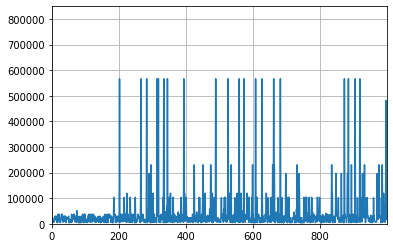

In [ ]:
env = WhalePulseEnv(signal, samplerate)
agent = QLearningAgent(env)
agent.train()

In [ ]:
data = pd.read_csv("REINFORCEMENT_ANNOTATIONS - SuperData.csv")
data

,Pulse #,General Time (s),Channel,Start Time (s),End Time (s),Peak Time (s),Peak (db),Target
0,1,20,1,19.10,20.15,20.00,-23.0,1
1,2,30,1,30.09,31.15,30.71,-23.0,1
2,3,41,1,40.25,41.25,40.80,-24.0,1
3,4,53,1,53.02,53.83,53.76,-33.0,1
4,5,64,1,64.50,65.96,65.24,-25.0,1
5,6,76,1,75.58,76.57,75.96,-26.0,1
6,7,102,1,102.70,103.55,103.21,-29.0,1
7,8,114,1,114.17,115.28,114.60,-28.0,1
8,9,140,1,140.00,141.10,140.50,-29.5,1
9,10,151,1,150.90,151.90,151.77,-29.0,1


In [ ]:
# band pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, low, btype='highpass')
    filtered_signal = filtfilt(b, a, signal)
    b, a = butter(order, high, btype='lowpass')
    filtered_signal = filtfilt(b, a, filtered_signal)
    return filtered_signal

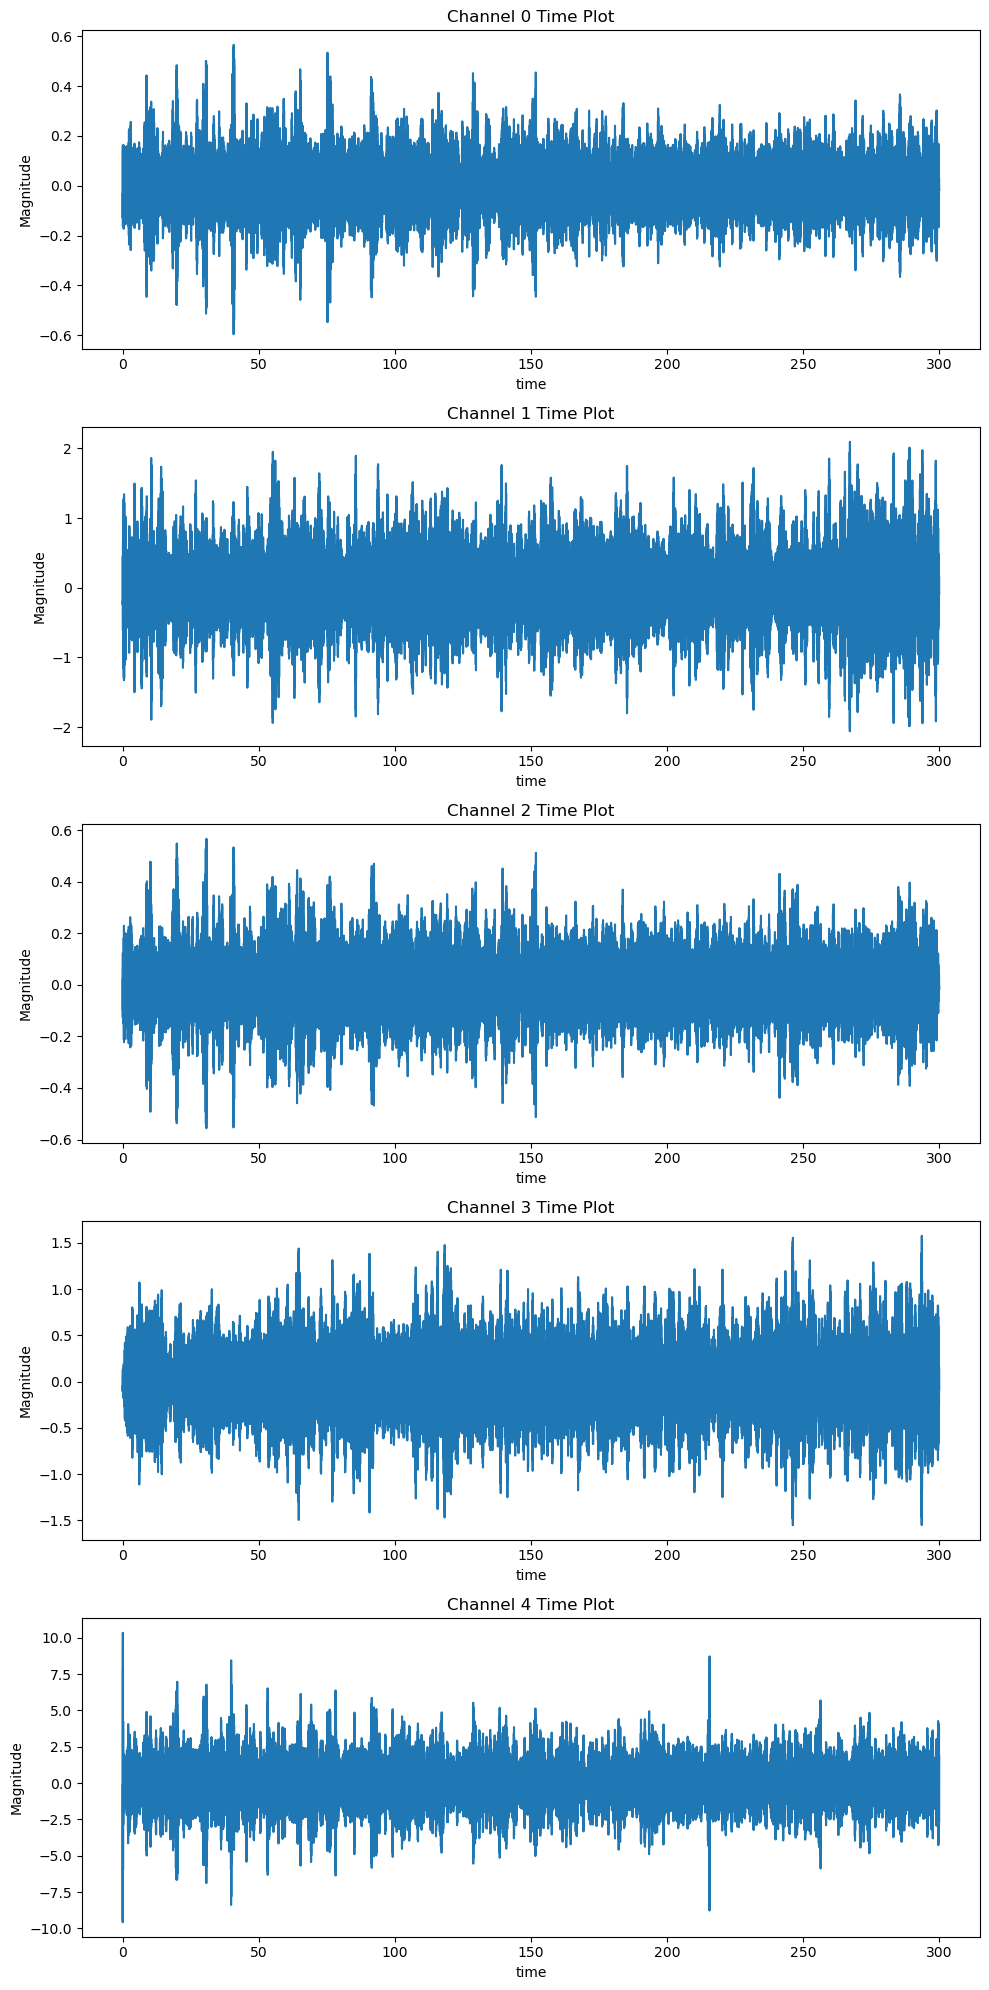

In [ ]:
lowcut = 15 # low-cut frequency
highcut = 25 # high-cut frequency
channels = np.split(signal, 5, axis=1)
signal_band = []

fig, axs = plt.subplots(5, 1, figsize=(10, 20))
for i, channel in enumerate(channels):
    signal_band.append(bandpass_filter(np.squeeze(channel), lowcut, highcut, samplerate, order=5))
    x = 1/samplerate*np.linspace(0, np.squeeze(channel).shape[0], np.squeeze(channel).shape[0])
    axs[i].plot(x, signal_band[-1])
    axs[i].set_xlabel("time")
    axs[i].set_ylabel("Magnitude")
    axs[i].set_title(f"Channel {i} Time Plot")

signal_band = np.swapaxes(np.array(signal_band),0,1)
plt.tight_layout()
plt.show()

In [ ]:
signal_band.shape

(599805, 5)

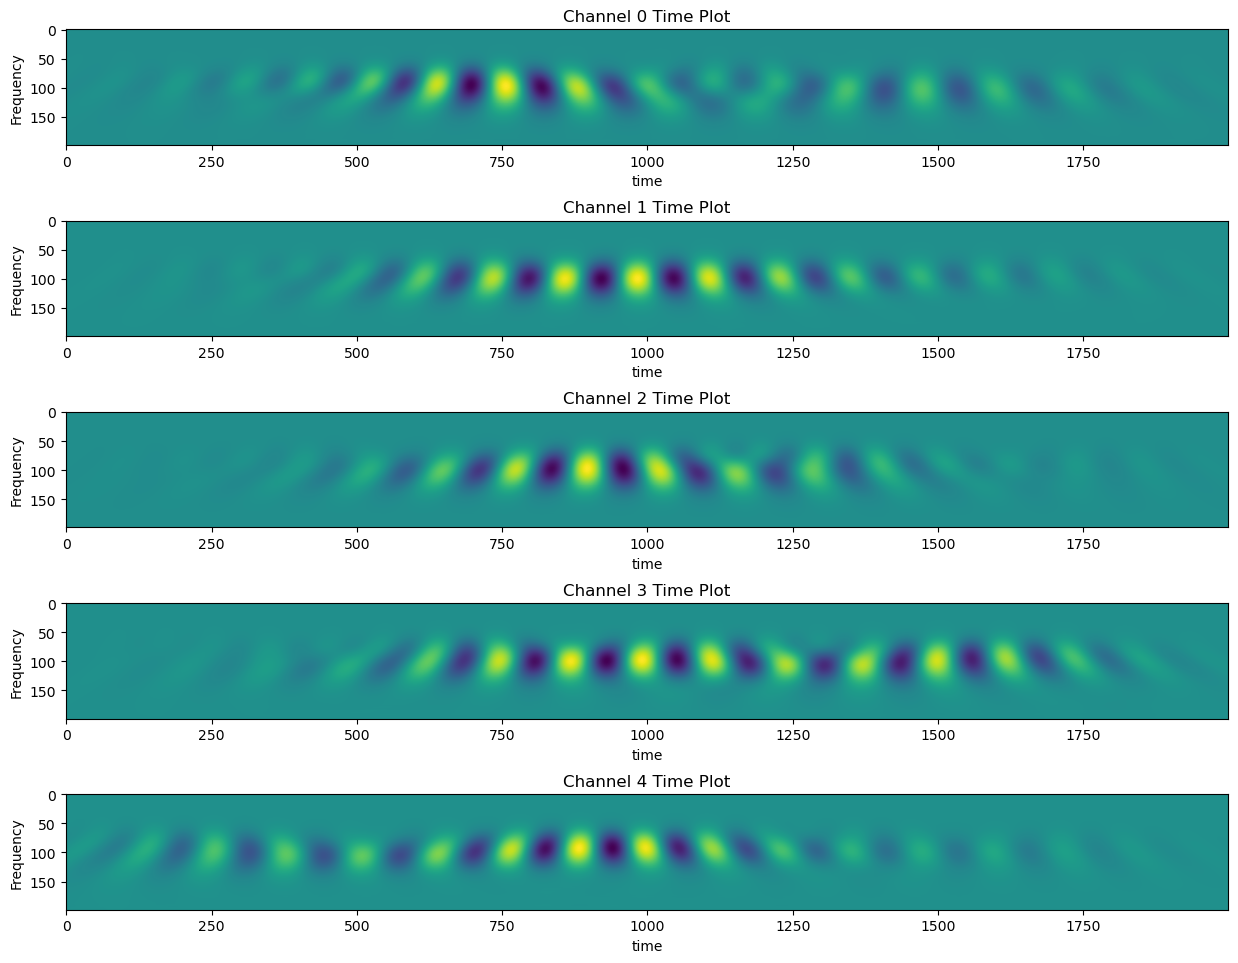

In [ ]:
signal = signal_band

L=2000
i=0
scales = np.arange(1,200,1 )

coef0,freqs = pywt.cwt(np.hanning(L)*signal[i:i+L,0], scales, 'morl')
coef1,freqs = pywt.cwt(np.hanning(L)*signal[i:i+L,1], scales, 'morl')
coef2,freqs = pywt.cwt(np.hanning(L)*signal[i:i+L,2], scales, 'morl')
coef3,freqs = pywt.cwt(np.hanning(L)*signal[i:i+L,3], scales, 'morl')
coef4,freqs = pywt.cwt(np.hanning(L)*(-signal[i:i+L,4]), scales, 'morl')

coefs = [coef0, coef1, coef2, coef3, coef4]
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
for i, channel in enumerate(coefs):
    # axs[i].plot(x, signal_band[-1])
    axs[i].imshow(channel)
    axs[i].set_xlabel("time")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Channel {i} Time Plot")

# plt.tight_layout()
plt.show()